# **Lab 3**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from scipy import stats

### **Problem 1**

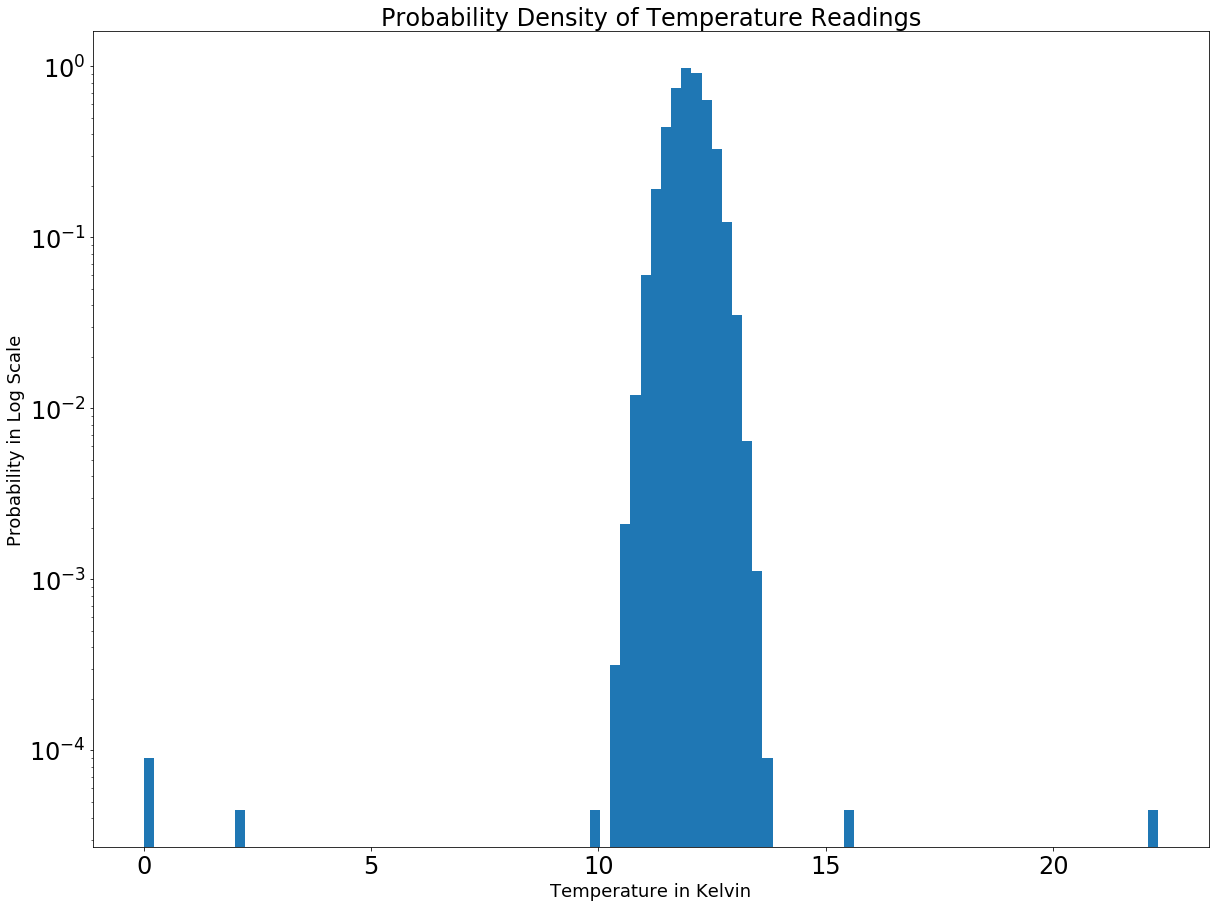

In [2]:
plt.rcParams["figure.figsize"] = (20,15)
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.title('Probability Density of Temperature Readings', fontsize = 24)
plt.xlabel('Temperature in Kelvin', fontsize = 18)
plt.ylabel('Probability in Log Scale', fontsize = 18)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.show()

**Section 1A.1**

From the code, we can see how there is a Gaussian distribution with 100k 'good' data points where mean is 12 and sigma is 0.4. This is because we want the temperature to be around 12 Kelvin with 0.4 degree precision of the thermometry. There are also 'bad' data points to represent error in the thermometry or temperature readings. 

**Section 1A.2**

The statistical question I have is how likely is the temperature reading to be produced by the background? The reason this is my statistical question is because the experiment works reliably when the temperature is around 12 Kelvin. According to the data, there is a 0.4 degree of precision of thermometry. We want to remove any data points which exceed the statistical threshold. 

**Section 1A.3**

My statistical question can be rephrased mathematically. Here, we know we have a Gaussian distribution of 100k 'good' data points where mean is 12 and sigma is 0.4. There are also 'bad' data points to represent error in thermometry. We want to filter out any data point which are n-sigma away from the mean. Mathematically, this means:

$\sigma = \frac{|X - \mu|}{0.4}$ 

**Section 1A.4**

In [3]:
d = np.array(d)
sigma = abs(d-12)/0.4
x = {'Temperature' : d, 'Sigma' : sigma}
temp = pd.DataFrame(x)

In [4]:
goodtemp = temp[temp['Sigma'] < 4]

In [5]:
badtemp = temp[temp['Sigma'] > 4]

**Section 1B**

The number of omissions depends on the statistical threshold we chose. This is because it is a predictable quantity since we know how much of the good data we threw out. Specifically, a z-table shows 1-sigma corresponds to ~68% of the data, 2-sigma correponds to ~95% of the data, and 3-sigma corresponds to ~99% of the data. This means approximately 32%, 5%, and 1% of the data is thrown out respectively. This can be applied to other sigma values using the z-table where the percentage thrown out is simply subtracting 100 by the value corresponding to n-sigma. 

**Section 1C**

There are mistakes of commision where bad data is getting in which is shown from our truth tables for our statistical tests. They can be avoidable by changing our statistical threshold to be a smaller value of sigma. However, this would mean we would be throwing away good data as well. These mistakes depend on our statistical threshold because the threshold determines how much of the data we keep and throw away which corresponds to a value from the z-table. 

### **Problem 2**

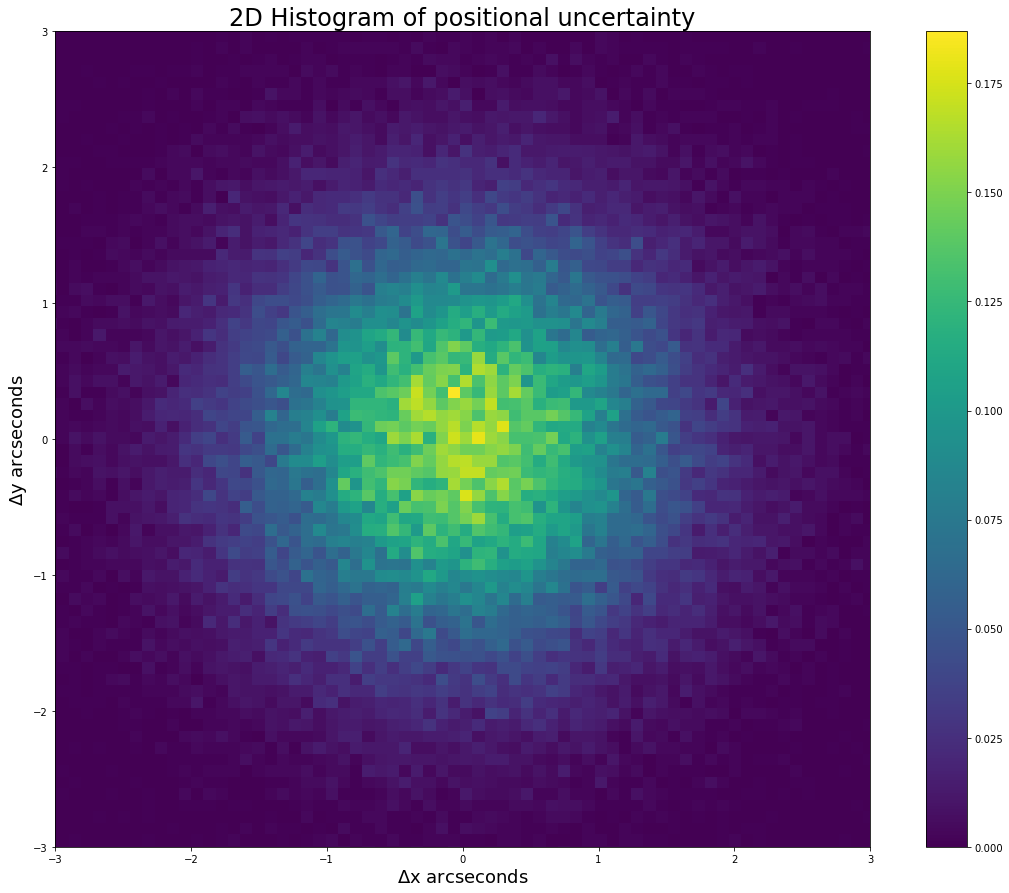

In [6]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

**Section 2.1**

The statistical question I have is what is the displacement or movement to see a 5-sigma detection from the background in arcseconds? The reason this is my statistical question is because an asteroid will have some true movement between the images. 

**Section 2.2**

From the code, we have a 2D Gaussian distribution with 100k data points where mean is 0 and sigma is 1. We would want to find at what value in the distribution corresponds to a 5-sigma detection from the background. 

**Section 2.3**

Here, we want to find the value which corresponds to 5-sigma detection from the background. Below is our calculation.

In [7]:
det = scipy.stats.rayleigh.ppf(stats.norm.cdf(5), loc=0, scale=1)
print(round(det, 2))

5.49


### **Problem 3**

At a trillion electron volt energies and above, the moon and the sun will block cosmic ray background. This means the sun and the moon will appear as holes in the cosmic ray sky since the rays are absorbed. We want to calculate the significance of our moon shadow detection. 

**Section 3.1**

We assume we normally have a cosmic ray rate of 1 ray per minute in a moon sized patch in the sky. We want to know the significance of our moon shadow detection if we see 6800 cosmic rays if we observe where the moon is for 8 hours per night for 15 days. Specifically, my question is what is the probability of the background producing a count of 6800 cosmic rays or less?

**Section 3.2**

The expected background pdf() is a Poisson distribution because we only see an integer number of cosmic rays. We want to be integrating from negative infinity to 6800 which corresponds to seeing 6800 cosmic rays or less. Specifically, this is the left tail of our distribution. This means the integral we would need to do is an integral of a Poisson distribution from negative infinity to 6800. 

**Section 3.3**

Here, we want to convert to sigma. Below is our calculations.